<a href="https://colab.research.google.com/github/crishabhkumar/Stock-Market-Prediction/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
#Data collection
import pandas_datareader as pdr

In [104]:
df = pdr.get_data_tiingo('MSFT',api_key = '9c785c221f5138685dcc23817521be0f288100bc')

In [105]:
import pandas as pd

In [106]:
df.head()

close   high  ...  divCash  splitFactor
symbol date                                     ...                      
MSFT   2016-11-28 00:00:00+00:00  60.61  61.02  ...      0.0          1.0
       2016-11-29 00:00:00+00:00  61.09  61.41  ...      0.0          1.0
       2016-11-30 00:00:00+00:00  60.26  61.18  ...      0.0          1.0
       2016-12-01 00:00:00+00:00  59.20  60.15  ...      0.0          1.0
       2016-12-02 00:00:00+00:00  59.25  59.47  ...      0.0          1.0

[5 rows x 12 columns]

In [107]:
df.tail()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
MSFT   2021-11-19 00:00:00+00:00  343.11  345.10  ...      0.0          1.0
       2021-11-22 00:00:00+00:00  339.83  349.67  ...      0.0          1.0
       2021-11-23 00:00:00+00:00  337.68  339.45  ...      0.0          1.0
       2021-11-24 00:00:00+00:00  337.91  338.16  ...      0.0          1.0
       2021-11-26 00:00:00+00:00  329.68  337.93  ...      0.0          1.0

[5 rows x 12 columns]

In [108]:
df2 = df

In [109]:
df1 = df2.reset_index()['close']

In [110]:
df1

0        60.61
1        61.09
2        60.26
3        59.20
4        59.25
         ...  
1254    343.11
1255    339.83
1256    337.68
1257    337.91
1258    329.68
Name: close, Length: 1259, dtype: float64

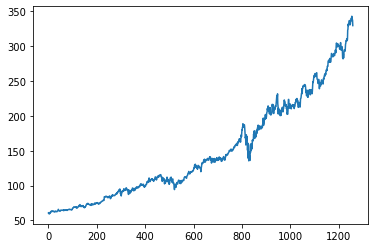

In [111]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [112]:
###LSTM are sensitive to the scale of the data. so we apply MINMAXSCALER

In [130]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape
df1

array([[0.00496636],
       [0.00665704],
       [0.00373358],
       ...,
       [0.98087422],
       [0.98168434],
       [0.95269628]])

In [131]:
###splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]


In [132]:
training_size,test_size

(818, 441)

In [133]:
len(train_data),len(test_data)

(818, 441)

In [134]:
 import numpy
 #convert an array of values into a dataset matrix
 def create_dataset(dataset, time_step = 1):
   dataX,dataY = [], []
   for i in range(len(dataset) - time_step-1):
      a = dataset[i:(i+time_step), 0]
      dataX.append(a)
      dataY.append(dataset[i + time_step, 0])
   return numpy.array(dataX), numpy.array(dataY)


In [136]:
#reshape into X=t,t+1,t+2,t+3 and Y = t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [138]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(717, 100)
(717,)
(340, 100)
(340,)


In [139]:
#reshape input to be [samples,time steps,features] which is basic requirements for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [140]:
#creating the LSTM model
#importing the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [141]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [142]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_15 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 192ms/step - loss: 1.7736e-04 - val_loss: 0.0014
Epoch 2/100
12/12 [==============================] - 2s 185ms/step - loss: 1.6576e-04 - val_loss: 0.0018
Epoch 3/100
12/12 [==============================] - 2s 189ms/step - loss: 1.7879e-04 - val_loss: 0.0014
Epoch 4/100
12/12 [==============================] - 2s 187ms/step - loss: 1.6348e-04 - val_loss: 0.0013
Epoch 5/100
12/12 [==============================] - 2s 189ms/step - loss: 1.7717e-04 - val_loss: 0.0014
Epoch 6/100
12/12 [==============================] - 2s 187ms/step - loss: 1.5577e-04 - val_loss: 0.0014
Epoch 7/100
12/12 [==============================] - 2s 190ms/step - loss: 1.4951e-04 - val_loss: 0.0015
Epoch 8/100
12/12 [==============================] - 2s 189ms/step - loss: 1.5163e-04 - val_loss: 0.0014
Epoch 9/100
12/12 [==============================] - 2s 191ms/step - loss: 1.5158e-04 - val_loss: 0.0013
Epoch 10/100
12/12 [==============================] - 2

In [145]:
import tensorflow as tf

In [146]:
###prediction part and check performance metrices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [147]:
#transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [148]:
###Calculate RMSE performance metrices
import math
from sklearn.metrics import mean_squared_error
#train data RMSE
print(math.sqrt(mean_squared_error(Y_train,train_predict)))
#test data RMSE
print(math.sqrt(mean_squared_error(Y_test,test_predict)))

0.011500459108844546
0.02626302154263204


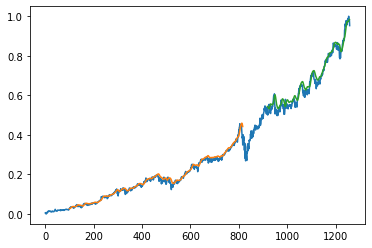

In [150]:
#plotting 
#shift of train prediction for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictin for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


#orange one is train prediction
#green one is test prediction
#blue one is real graph


In [152]:
len(test_data)

441

In [185]:
#taking past 100 days data to predict the future upcoming prices 
X_input = test_data[341:].reshape(1,-1)
X_input.shape

(1, 100)

In [186]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()
len(temp_input)

100

In [187]:
temp_input

[0.7686238596738405,
 0.7704554260152867,
 0.7682716353774085,
 0.7811630446268186,
 0.7865520763622276,
 0.7813391567750344,
 0.780352928745025,
 0.7671797400584693,
 0.7753161213060479,
 0.7826423866718327,
 0.7993378183227081,
 0.8117713359867565,
 0.8095875453488784,
 0.8007467155084359,
 0.7996195977598538,
 0.8006058257898631,
 0.7950054594765948,
 0.794688457609806,
 0.8027896164277414,
 0.8006410482195062,
 0.8112429995421085,
 0.8110316649642494,
 0.8070515304145681,
 0.8003944912120039,
 0.8021908351238071,
 0.8122644500017614,
 0.8229720686132932,
 0.8291359938008526,
 0.8237821844950867,
 0.8155049135289355,
 0.8367792610334263,
 0.8635130851326126,
 0.8645345355922652,
 0.8573843823746964,
 0.8552358141664612,
 0.8449508647106477,
 0.8471698777781694,
 0.8608009580500863,
 0.8547779225810997,
 0.8546018104328837,
 0.8522066852171463,
 0.8521714627875031,
 0.8487901095417564,
 0.8488957768306858,
 0.8384699376562997,
 0.8330456834912473,
 0.8375541544855766,
 0.847416434785

In [188]:
X_input

array([[0.76862386, 0.77045543, 0.76827164, 0.78116304, 0.78655208,
        0.78133916, 0.78035293, 0.76717974, 0.77531612, 0.78264239,
        0.79933782, 0.81177134, 0.80958755, 0.80074672, 0.7996196 ,
        0.80060583, 0.79500546, 0.79468846, 0.80278962, 0.80064105,
        0.811243  , 0.81103166, 0.80705153, 0.80039449, 0.80219084,
        0.81226445, 0.82297207, 0.82913599, 0.82378218, 0.81550491,
        0.83677926, 0.86351309, 0.86453454, 0.85738438, 0.85523581,
        0.84495086, 0.84716988, 0.86080096, 0.85477792, 0.85460181,
        0.85220669, 0.85217146, 0.84879011, 0.84889578, 0.83846994,
        0.83304568, 0.83755415, 0.84741643, 0.86513332, 0.86654221,
        0.84769821, 0.82807932, 0.82984044, 0.84315452, 0.84660632,
        0.84586665, 0.82762143, 0.79010954, 0.79180022, 0.78447395,
        0.80976366, 0.78866542, 0.80856609, 0.82388785, 0.83001655,
        0.83001655, 0.82783276, 0.82307774, 0.83515903, 0.85784227,
        0.86298475, 0.87383326, 0.87714417, 0.87

In [201]:
#Demonstrating prediction for upcoming 100days
from numpy import array
lst_output = []
n_steps = 100
i = 0
while(i < 100):
  if(len(temp_input) > 100):
    X_input = np.array(temp_input[1:])
    X_input = X_input.reshape(1,-1)
    X_input = X_input.reshape((1,n_steps, 1))
    yhat = model.predict(X_input,verbose = 0)
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    X_input = X_input.reshape((1,n_steps,1))
    yhat = model.predict(X_input, verbose = 0)
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)



[[0.9870626926422119], [0.9874756932258606], [0.9878696203231812], [0.9882445335388184], [0.988602340221405], [0.9889430403709412], [0.9892684817314148], [0.9895793199539185], [0.9898771643638611], [0.9901620149612427], [0.9904361963272095], [0.9907001256942749], [0.9909545183181763], [0.9912003874778748], [0.9914387464523315], [0.9916698932647705], [0.9918946623802185], [0.9921135902404785], [0.9923269748687744], [0.9925352334976196], [0.9927387833595276], [0.9929382801055908], [0.9931333065032959], [0.9933246970176697], [0.9935118556022644], [0.9936956167221069], [0.9938755035400391], [0.9940521717071533], [0.9942249059677124], [0.9943945407867432], [0.9945605993270874], [0.9947236180305481], [0.9948824644088745], [0.9950383901596069], [0.9951907396316528], [0.9953398704528809], [0.9954854846000671], [0.9956278204917908], [0.9957670569419861], [0.9959025382995605], [0.9960349798202515], [0.9961642026901245], [0.9962902069091797], [0.9964131712913513], [0.9965329170227051], [0.9966496

In [202]:
day_new = np.arange(1,101)
day_pred = np.arange(101,201)

In [203]:
len(df1)

1259

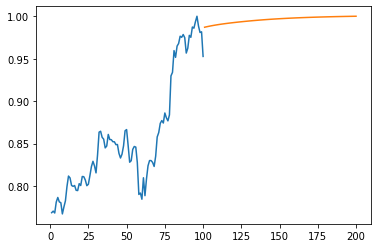

In [204]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

#orange line in our prediction value

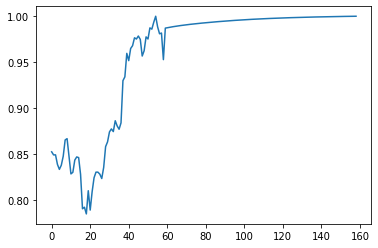

In [205]:
#combination of prediction and original values
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])